In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()
print(type(digits))
print(digits.data.shape)


<class 'sklearn.utils.Bunch'>
(1797, 64)


<Figure size 432x288 with 0 Axes>

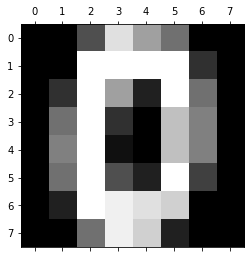

0


In [3]:
plt.gray() 
plt.matshow(digits.images[160]) 
plt.show()
print(digits.target[160])

In [4]:
def initialize(m,features) :
    weights = np.random.randint(100,size=(features+1,1))*0.01
    X = digits.data
    y = digits.target.reshape(m,1)
    X = np.c_[np.ones((m,1)),X]
    
    return X,y,weights


In [5]:
def sigmoid(z) :
    sig = 1/(1+np.exp(-z)) 
    return sig

In [6]:
def gradient_descent(X,y,weights,learning_rate,iterations) :
    for i in range(iterations) :
        # X -> m,65   weights -> 65,1
        hypothesis = sigmoid(np.dot(X,weights))
        with np.errstate(all='ignore'):
            cost = -np.mean(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))
        cost_diff = -np.mean(X*(y-hypothesis),axis = 0).reshape(features+1,1)
        weights = weights -  learning_rate*(cost_diff)   
    print("Cost", cost)
    return weights

In [7]:
def train(m,features,k):
    final_weights = np.zeros((features+1,1))
    for i in range(k) :
        print("For digit",i)
        
        X_mod,y,weights = initialize(m,features)

        rows = (y == i)
        output = rows.astype(int).reshape((X_mod.shape[0],1))

        weights = gradient_descent(X_mod,output,weights,learning_rate=0.05,iterations=500)
        final_weights = np.concatenate((final_weights,weights),axis=1)
    final_weights = final_weights[:,1:]
    return final_weights,X_mod,y

In [8]:
def predict(X,y,m,final_weights):
    predictions = sigmoid(np.dot(X,final_weights))
    predictions = np.argmax(predictions,axis = 1).reshape(m,1)
    accuracy = (predictions == y)
    print("Accuracy of model",np.mean(accuracy)*100)
    return predictions

In [9]:

m = digits.data.shape[0]
features = digits.data.shape[1]
k = 10  # number of digits (classes)

final_weights,X,y = train(m,features,k)
prediction = predict(X,y,m,final_weights) 

For digit 0
Cost 0.004005865495472502
For digit 1
Cost 0.05194270381938929
For digit 2
Cost 0.006155016895986413
For digit 3
Cost 0.033516574307512474
For digit 4
Cost 0.007988061227620993
For digit 5
Cost 0.02473045613600106
For digit 6
Cost 0.014086599042477756
For digit 7
Cost nan
For digit 8
Cost 0.14358592263717856
For digit 9
Cost 0.045589775111051334
Accuracy of model 96.661101836394


In [15]:
predictions = sigmoid(np.dot(X[-1],final_weights))
print(np.argmax(predictions))

8


In [26]:
count = 0
for i in range(m):
    blah = X[i].reshape(1,features+1)
    
    predictions = sigmoid(np.dot(blah,final_weights))
    if np.argmax(predictions) == y[i]:
        count += 1
print(X.shape,X[i].shape,final_weights.shape)
print(count)

(1797, 65) (65,) (65, 10)
1737
